In [4]:
import xarray as xr
import cartopy.crs as crs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
url = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer = 'BlueMarble_NextGeneration'


In [5]:
ds = xr.open_dataset("/Users/james/Documents/Github/esm_lab/MOM6/analysis/output/nwa25/20100105.ocean_daily.nc")

In [6]:
ds

<xarray.Dataset>
Dimensions:     (nv: 2, time: 5, xh: 1550, yh: 1690)
Coordinates:
  * xh          (xh) float64 -98.02 -97.98 -97.94 -97.9 ... -36.16 -36.12 -36.08
  * yh          (yh) float64 5.253 5.292 5.332 5.372 ... 51.91 51.92 51.93 51.94
  * time        (time) object 2010-01-06 01:00:00 ... 2010-01-10 01:00:00
  * nv          (nv) float64 1.0 2.0
Data variables:
    ssh         (time, yh, xh) float32 ...
    sst         (time, yh, xh) float32 ...
    average_T1  (time) datetime64[ns] ...
    average_T2  (time) datetime64[ns] ...
    average_DT  (time) timedelta64[ns] ...
    time_bnds   (time, nv) timedelta64[ns] ...
Attributes:
    filename:   20100105.ocean_daily.nc
    title:      NWA-hycom1
    grid_type:  regular
    grid_tile:  N/A

/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "1" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "2" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "3" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "4" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "5" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/james/opt/anaconda

Text(0.5, 1.0, 'NWA25 MOM6 Output - 2010-01-06 01:00:00')

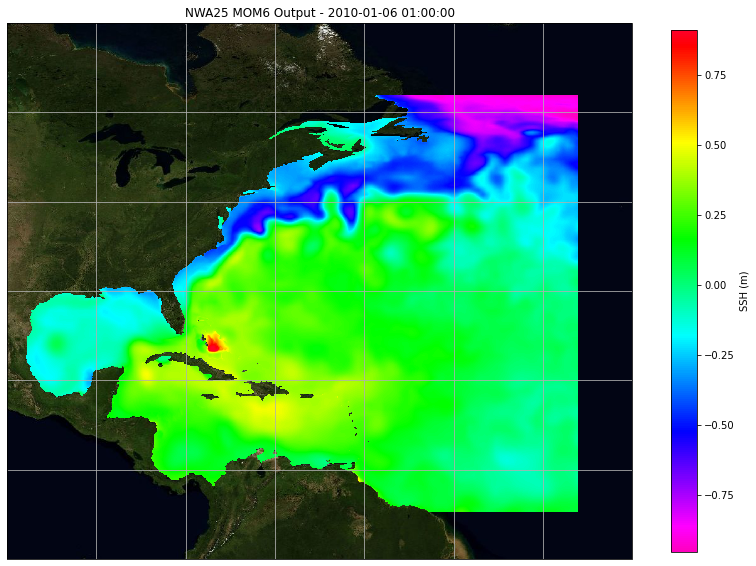

In [39]:
figure = plt.figure(figsize=(14,12))
ax = figure.add_subplot(1,1,1, projection=crs.PlateCarree())
ax.add_wmts(url, layer)
ax.set_extent([-100, -30, 0,60], crs=crs.PlateCarree())
im = ax.pcolormesh(ds.xh.values, ds.yh.values, ds.ssh[0].values, transform=crs.PlateCarree(), cmap='gist_rainbow_r')
ax.add_wmts(url, 'BlueMarble_NextGeneration')
plt.colorbar(im, label="SSH (m)", shrink=0.8)
ax.gridlines()
plt.title("NWA25 MOM6 Output - " + str(ds.time[0].values))


/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "1" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "2" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "3" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "4" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/james/opt/anaconda3/envs/gridtools/lib/python3.9/site-packages/owslib/wmts.py:643: RuntimeWarning: TileMatrixLimits with tileMatrix "5" already exists
  warnings.warn(msg, RuntimeWarning)
/Users/james/opt/anaconda

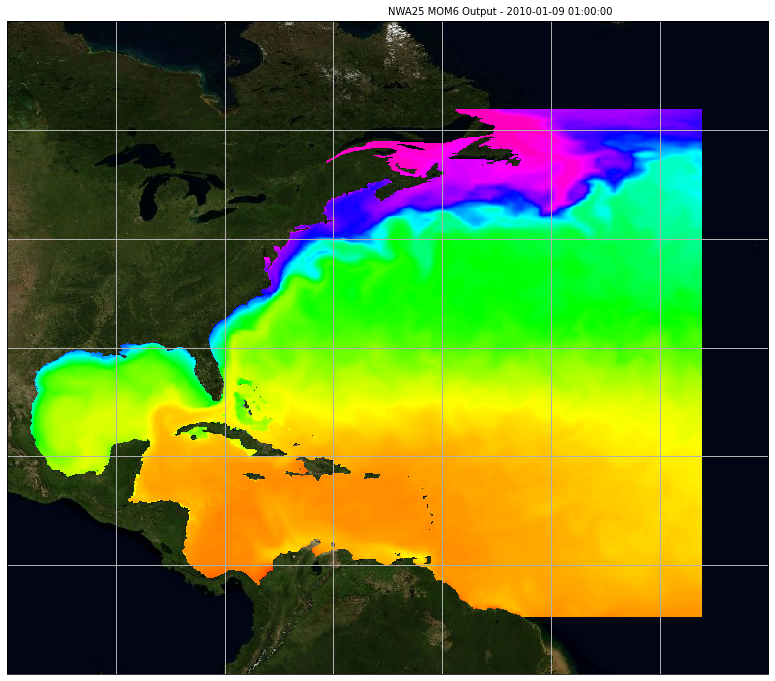

In [38]:
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML


figure = plt.figure(figsize=(14,12))
ax = figure.add_subplot(1,1,1, projection=crs.PlateCarree())
ax.add_wmts(url, layer)
ax.set_extent([-100, -30, 0,60], crs=crs.PlateCarree())
camera = Camera(figure)
#ax.colorbar(im, label="SST (degC)", shrink=0.8)
for i in range(len(ds.time.values)-1):
    im = ax.pcolormesh(ds.xh.values, ds.yh.values, ds.sst[i].values, transform=crs.PlateCarree(), cmap='gist_rainbow_r', vmin=0, vmax=32)
    ax.add_wmts(url, 'BlueMarble_NextGeneration')
    ax.gridlines()
    ax.text(0.5, 1.01, "NWA25 MOM6 Output - " + str(ds.time[i].values), transform=ax.transAxes) # making the dynamic title
    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video())

In [35]:
ds.time[1].values

array(cftime.DatetimeJulian(2010, 1, 7, 1, 0, 0, 0, has_year_zero=False),
      dtype=object)